# Predicting Students score based number of hours studied.

The aim of this is to predict the percentage score that a student is expected to score based on number of he/she studies.
We are using Simple Linear Regression Model to complete this task

### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

### Importing the Data

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data1=data
print("The data was imported successfully")
data

The data was imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Basic characteristics of our data

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

**Visualizing data helps us get more clear idea about it** 

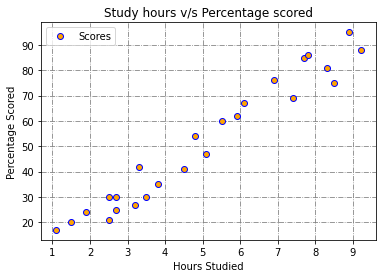

In [4]:
data.plot(x='Hours', y='Scores',style='o',markeredgecolor='blue',markerfacecolor='orange')  
plt.title('Study hours v/s Percentage scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored') 
plt.grid(True, color = 'gray', linestyle = "-.")
plt.show()

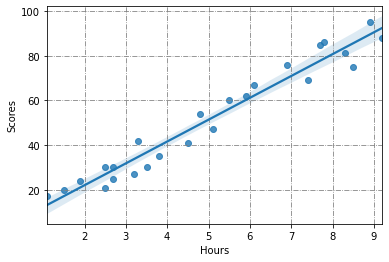

In [5]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.grid(True, color = 'gray', linestyle = "-.")

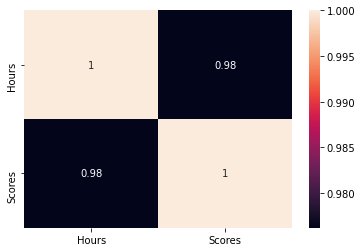

In [6]:
correlation = data.corr()
sns.heatmap(correlation,annot=True)

**Data manipulation basics**

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
x = data.iloc[:,:1]
y = data.iloc[:,1:]

In [9]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


# Linear regression model

### Splitting training and testing data

In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30 ,random_state=0)

In [12]:
print("Test Set")
print(x_test.shape)
print(y_test.shape)

Test Set
(8, 1)
(8, 1)


In [13]:
print("Training Set")
print(x_train.shape)
print(y_train.shape)

Training Set
(17, 1)
(17, 1)


### Training the model

In [14]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
regressor.coef_

array([[9.78856669]])

In [16]:
regressor.intercept_

array([2.37081538])

### Predicting the model

In [17]:
y_pred = regressor.predict(x_test)

In [18]:
y_pred = pd.DataFrame(y_pred,columns=['Predicted Values'])
y_pred.head()

,Predicted Values
0,17.053665
1,33.694229
2,74.806209
3,26.842232
4,60.123359


### Plotting regression line and plotting for test data

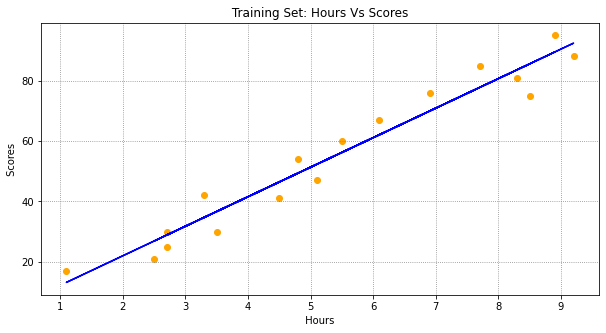

In [19]:
# Plotting & Visualizing training set & regression line
plt.figure(figsize = (10,5))
plt.scatter(x_train, y_train, color = "orange")
plt.plot(x_train, regressor.predict(x_train), color = "blue")
plt.title(" Training Set: Hours Vs Scores ")
plt.xlabel(" Hours ")
plt.ylabel(" Scores ")
plt.grid(True, color = 'gray' , linestyle = ":")
plt.show()

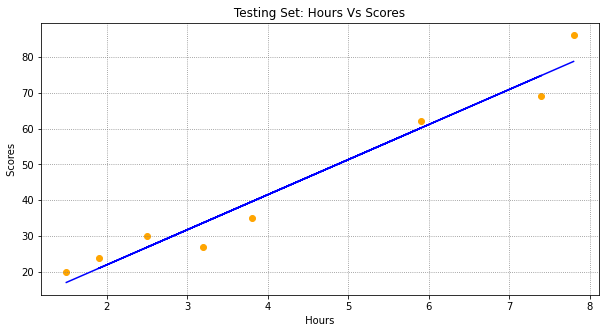

In [20]:

# Plotting & Visualizing training set & regression line
plt.figure(figsize = (10,5))
plt.scatter(x_test, y_test, color = "orange")
plt.plot(x_test, y_pred, color = "blue")
plt.title(" Testing Set: Hours Vs Scores ")
plt.xlabel(" Hours ")
plt.ylabel(" Scores ")
plt.grid(True, color = 'gray' , linestyle = ":")
plt.show()

### Checking the accuracy scores for training and test set

In [21]:
print('Test Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Test Score
0.9568211104435257
Training Score
0.9484997422695115


### Making predictions

In [22]:
# To predict the score if the student studies for 9.25 hrs in a day
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [92.91505723]


### Evaluating the model

In [23]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.419727808027652


In [24]:
error = metrics.mean_squared_error(y_test,y_pred)
print ("Mean Square Error: ",error)

Mean Square Error:  22.96509721270043


In [25]:
print ('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Square Error:  4.792191274636315


In [26]:
print("R^2 score: ",metrics.r2_score(y_test, y_pred))

R^2 score:  0.9568211104435257


## Thank You